# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [39]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [40]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For clusters =2,The average silhouette_score is :0.5027144446956527
For clusters =3,The average silhouette_score is :0.6105565451092732
For clusters =4,The average silhouette_score is :0.6270122040179333
For clusters =5,The average silhouette_score is :0.6115749260799671
For clusters =6,The average silhouette_score is :0.5499388428924794
For clusters =7,The average silhouette_score is :0.4695416652197068
For clusters =8,The average silhouette_score is :0.4231800504179843


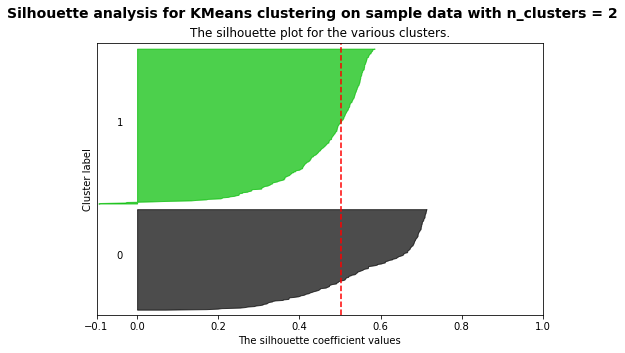

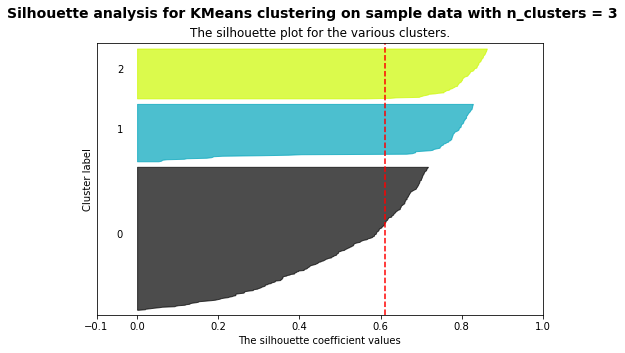

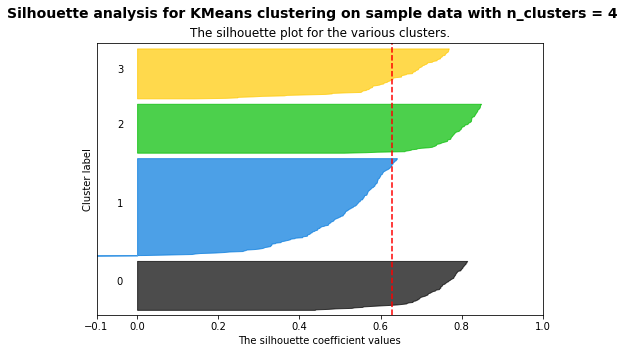

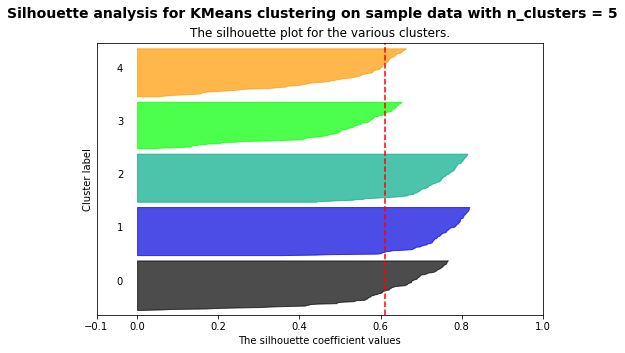

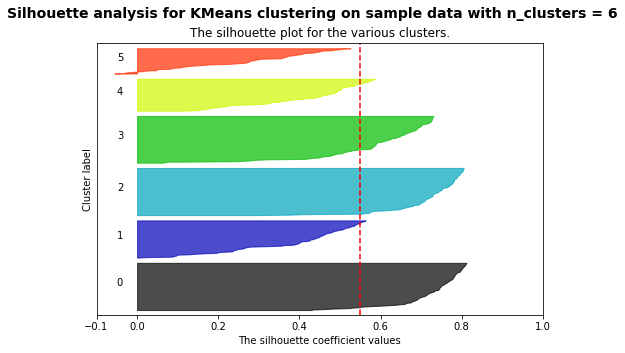

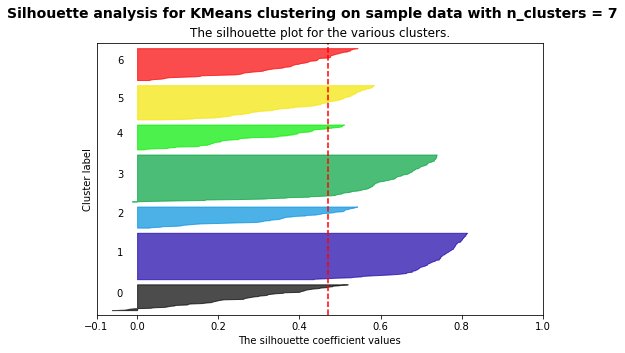

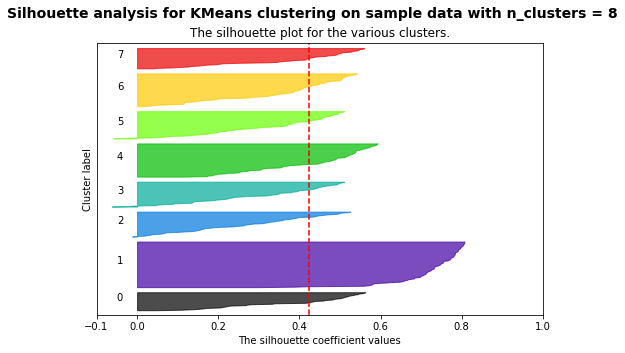

In [43]:
# 計算並繪製輪廓分析的結果

for clusters in range_n_clusters :
    cluster=KMeans(n_clusters=clusters,random_state=10)
    cluster_labels=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print(f'For clusters ={clusters},The average silhouette_score is :{silhouette_avg}')
    
    plt.figure(figsize=(8, 5))    
    plt.xlim([-0.1, 1])
    plt.ylim([0,len(X) + (clusters + 1) * 10])
    #plt.ylim([0,len(X)])
            
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    y_lower = 10
    for i in range(clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
       
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        plt.yticks([])  # 清空 y 軸的格線
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")
        
        y_lower=y_upper+10
        
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % clusters),
                 fontsize=14, fontweight='bold')
    
plt.show()               